<a href="https://colab.research.google.com/github/merveeaarslan/H-CNN_fashionmnist/blob/main/HCNN_2SEV%C4%B0YE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()
#import tensorflow.contrib.eager as tfe
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from tensorflow.keras.layers import Dense, BatchNormalization
from keras.utils.vis_utils import model_to_dot
from keras.utils import np_utils

from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

!pip install ipython-autotime
%load_ext autotime

time: 419 µs (started: 2022-01-11 09:56:23 +00:00)


In [ ]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step
time: 865 ms (started: 2022-01-11 09:56:35 +00:00)


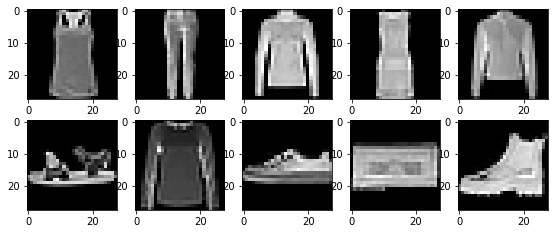

time: 1.31 s (started: 2022-01-11 09:56:41 +00:00)


In [ ]:
Label_map = {}
for i, y in enumerate(y_train):
    if y in Label_map:
        Label_map[y].append(i)
    else:
        Label_map[y] = [i]
# View 12 random images with specific label
rows = 2
columns = 5
scale_factor = 15
def ShowImages():
    figsize_x = x_train[0].shape[1] * columns / scale_factor
    figsize_y = x_train[0].shape[0] * rows / scale_factor
    fig = plt.figure(figsize=(figsize_x, figsize_y))
    for i in range(1, columns*rows +1):
        np.random.shuffle(Label_map[i - 1])
        fig.add_subplot(rows, columns, i)
        img_index = Label_map[i - 1][0]
        plt.imshow(x_train[img_index], cmap='gray')
    plt.show()
ShowImages()

In [ ]:
for i in range(0, 10):
    print(len(Label_map.get(i)))

6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
time: 3.38 ms (started: 2022-01-11 09:56:48 +00:00)


In [ ]:
def convertOneHot(labels, num_classes):
    return np.array([np.eye(num_classes)[label] for label in labels])

# Normalize images and add channel axis
X_train = (x_train/255)[..., np.newaxis] 
X_test = (x_test/255)[..., np.newaxis] 

# Convert labels to one hot
num_classes = max(y_train) + 1
Classes = np.unique(y_train)
Y_train = convertOneHot(y_train, num_classes)
Y_test = convertOneHot(y_test, num_classes)

print(X_train.shape)
print(Y_train.shape)

(60000, 28, 28, 1)
(60000, 10)
time: 581 ms (started: 2022-01-11 09:56:53 +00:00)


In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import ModelCheckpoint
def build_and_train(x_train, y_train,model, epochs=60):
    x_t, x_v, y_t, y_v = train_test_split(x_train, y_train)
    train_datagen = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,)
    if model == None:
       model = keras.Sequential([
                          #3.BLOK
                          keras.layers.Conv2D(input_shape=x_train[0].shape,filters=256,kernel_size=(3,3),padding="same", activation="relu"),
                          keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"),
                          keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"),
                          keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
                          #4.BLOK
                          keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
                          keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
                          keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
                          keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
                           #5.BLOK
                          keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
                          keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
                          keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
                          keras.layers.Flatten(),
                          #model.add(Dense(units=4096,activation="relu"))
                          #model.add(Dense(units=4096,activation="relu"))
                          keras.layers.Dense(4096, activation='relu'),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense((y_train[0].shape[0]), activation='softmax'),
                          ]);
    Best_model = '/content/drive/MyDrive/uygulama/vgg16.h5'
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    callbacks = [keras.callbacks.ModelCheckpoint(filepath=Best_model, monitor='val_accuracy', save_best_only=True)]
    model.fit_generator(
        train_datagen.flow(x_t, y_t, batch_size=128),
        steps_per_epoch=len(x_t) / 32,
        epochs=epochs,
        validation_data=(x_v, y_v),
        callbacks=callbacks,
       # initial_epoch=10
        )
    best = keras.models.load_model(Best_model)
    best.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return best

time: 47.5 ms (started: 2022-01-11 10:42:46 +00:00)


In [ ]:
def buildClassDict(class_groups):
    class_dict = {}
    for i, group in enumerate(class_groups):
        for val in group:
            class_dict[val] = i
    return class_dict

def remapAndFilter(data, labels, class_dict, class_groups):
    new_labels = []
    new_data = []
    for idx, label in enumerate(labels):
        if label in class_dict:
            new_label = class_dict[label]
            new_labels.append(new_label)
            new_data.append(data[idx])
    return np.array(new_data), convertOneHot(new_labels, len(class_groups))

time: 8.53 ms (started: 2022-01-11 10:00:36 +00:00)


3 SINIFA AYIRMA
TRAİN:0.6041
TEST:0.6000

In [ ]:
# Root classifier
Class_groups = [[0, 1, 2, 3, 4, 6], [5, 7, 9], [8]]
Class_dict = buildClassDict(Class_groups)

remapped_x_train, remapped_y_train = remapAndFilter(X_train, y_train, Class_dict, Class_groups)
remapped_x_test, remapped_y_test = remapAndFilter(X_test, y_test, Class_dict, Class_groups)

model = keras.Sequential([
                          #1.BLOK
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=remapped_x_train[0].shape),
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=remapped_x_train[0].shape),
    keras.layers.BatchNormalization(momentum=0.1),
    keras.layers.MaxPool2D((2, 2)),
                           #2.BLOK
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dense(remapped_y_train[0].shape[0]),
]);

root = build_and_train(remapped_x_train, remapped_y_train, model)



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1963: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/60
1406/1406 [==============================] - 15s 10ms/step - loss: 6.4842 - accuracy: 0.5978 - val_loss: 6.3806 - val_accuracy: 0.6041
time: 22.5 s (started: 2022-01-11 10:27:31 +00:00)


In [ ]:
# Evaluate model
results = root.evaluate(remapped_x_test, remapped_y_test )
print(root.metrics_names)
print(results)

313/313 [==============================] - 3s 7ms/step - loss: 6.4472 - accuracy: 0.6000
['loss', 'accuracy']
[6.44723653793335, 0.6000000238418579]
time: 2.6 s (started: 2022-01-11 10:28:12 +00:00)


Cloth Classifier
Acc: 0.6894

In [ ]:
# Cloth classifier
Cloth_groups = [[0],[1], [2], [3], [4], [6]]
Cloth_dict = buildClassDict(Cloth_groups)

remapped_x_train, remapped_y_train = remapAndFilter(X_train, y_train, Cloth_dict, Cloth_groups)
remapped_x_test, remapped_y_test = remapAndFilter(X_test, y_test, Cloth_dict, Cloth_groups)


cloth = build_and_train(remapped_x_train, remapped_y_train,model=None)

# Evaluate model
results = cloth.evaluate(remapped_x_test, remapped_y_test)
print(cloth.metrics_names)
print(results)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1963: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/60
188/188 [==============================] - 10s 49ms/step - loss: 0.7946 - accuracy: 0.6895
['loss', 'accuracy']
[0.7946262359619141, 0.6894999742507935]
time: 2min 6s (started: 2022-01-11 10:43:40 +00:00)


Shoes Classifier
Acc:0.85

In [ ]:
# Shoes classifier
Shoes_groups = [[5], [7], [9]]
Shoes_dict = buildClassDict(Shoes_groups)

remapped_x_train, remapped_y_train = remapAndFilter(X_train, y_train, Shoes_dict, Shoes_groups)
remapped_x_test, remapped_y_test = remapAndFilter(X_test, y_test, Shoes_dict, Shoes_groups)

shoes = build_and_train(remapped_x_train, remapped_y_train, model=None)

# Evaluate model
results = shoes.evaluate(remapped_x_test, remapped_y_test)
print(shoes.metrics_names)
print(results)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1963: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/60
94/94 [==============================] - 6s 60ms/step - loss: 0.4130 - accuracy: 0.8513
['loss', 'accuracy']
[0.41300541162490845, 0.8513333201408386]
time: 1min 33s (started: 2022-01-11 10:46:15 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score
from scipy.special import softmax

def predict(x):
    y_root = root.predict(x)
    y_shoes = shoes.predict(x)
    y_cloth = cloth.predict(x)
    y_pred = []
    for (y_r, y_s, y_c) in zip(y_root, y_shoes, y_cloth):
        y_r = softmax(y_r)
        y_c = softmax(y_c)
        y_s = softmax(y_s)
        
        y = np.zeros(num_classes)
        y[9] = y_r[Class_dict[9]]
        for i in Class_groups[0]:
            y[i] = y_r[0] * y_c[Cloth_dict[i]]
            
        for i in Class_groups[1]:
            y[i] = y_r[1] * y_s[Shoes_dict[i]]
        y_pred.append(y)
    return y_pred
y_pred = predict(X_test)
y_labels = [np.argmax(pred) for pred in y_pred]
accuracy_score(y_test, y_labels)
print(accuracy_score(y_test, y_labels))

0.4137
time: 31 s (started: 2022-01-11 10:55:33 +00:00)
